# No cell should need editing until you are told.
### Follow along with code, be sure to **read the comments**

Make a Copy of this notebook and add your name to the front.

Save a shortcut to the folder in your drive and the following cells should work without any editing.

Please select Runtime -> Run all before you continue. The training takes 20 min, so lets start it now before we read through the code.

In [1]:
#Standard import functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import tensorflow as tf
import scipy.io as sio
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading data should be familiar by now. This folder should be shared with you, so no editing should be needed.**

If it doesn't work, I trust you know how to save the file and load it through your own drive.

m=10000, xn=3, yn=99


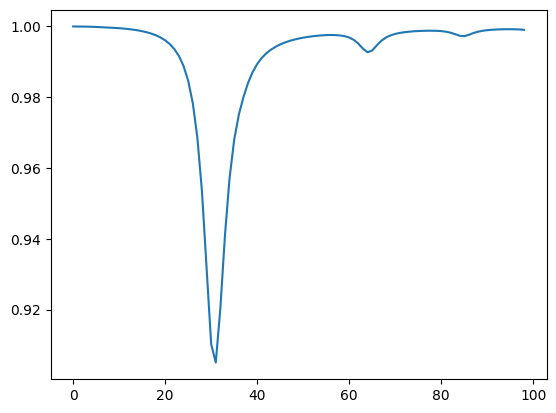

In [5]:
# Load data
data = sio.loadmat('/content/drive/MyDrive/Colab Notebooks/Inverse-design-hw/gnr_test.mat')
X = data['X'] # input data
Y = np.abs(data['Y'])
Y = Y[:, 1:]  #output data

m = X.shape[0]
xn = X.shape[1]
yn = Y.shape[1]
print(f'm={m}, xn={xn}, yn={yn}') # Note the shapes of the input and output

#Plot one of the spectrums
plt.plot(Y[15,:])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #you know what this does by now

## Walk through tensor flow

In this class we have used Pytorch. This model will use the alternative package TensorFlow. You will not need to code any thing youself; for now follow along with the code reading the comments.

Note: TensorFlow does not require each layer to match the input and output dimensions as Pytorch does. TensorFlow takes the dimensions of each hidden layer and makes the connections itself.

In [6]:
# Initialize model
model = tf.keras.Sequential()

# The first layer requires both input_dim and units; these need not be the same value
# the weights matrix will be a (units x input_dim) matrix, so different values of these variables will simply resize the data.
model.add(tf.keras.layers.Dense(units=xn, activation = 'linear', input_dim=xn))

model.add(tf.keras.layers.Dense(units=256, activation = 'relu')) # 256 is the size of this hidden layer
model.add(tf.keras.layers.Dense(units=256, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=yn, activation = 'linear')) # yn is the dimension of the output layer
opt = tf.keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt) #specifying loss and optimizer
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 99)             │        25,443 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,271 (360.43 KB)

 Trainable params: 92,271 (360.43 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#Train Model
history = model.fit(X_train, Y_train, epochs=1000, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/1000
250/250 - 4s - 15ms/step - loss: 0.2939 - val_loss: 0.0282
Epoch 2/1000
250/250 - 3s - 12ms/step - loss: 0.0273 - val_loss: 0.0250
Epoch 3/1000
250/250 - 1s - 5ms/step - loss: 0.0239 - val_loss: 0.0209
Epoch 4/1000
250/250 - 1s - 3ms/step - loss: 0.0204 - val_loss: 0.0173
Epoch 5/1000
250/250 - 1s - 5ms/step - loss: 0.0140 - val_loss: 0.0098
Epoch 6/1000
250/250 - 1s - 3ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 7/1000
250/250 - 1s - 3ms/step - loss: 0.0026 - val_loss: 8.1401e-04
Epoch 8/1000
250/250 - 1s - 3ms/step - loss: 8.3412e-04 - val_loss: 4.0611e-04
Epoch 9/1000
250/250 - 1s - 5ms/step - loss: 6.1890e-04 - val_loss: 8.8283e-04
Epoch 10/1000
250/250 - 1s - 5ms/step - loss: 6.3038e-04 - val_loss: 2.9203e-04
Epoch 11/1000
250/250 - 2s - 7ms/step - loss: 9.4029e-04 - val_loss: 2.3562e-04
Epoch 12/1000
250/250 - 1s - 4ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 13/1000
250/250 - 1s - 3ms/step - loss: 6.3648e-04 - val_loss: 3.5460e-04
Epoch 14/1000
250/250 - 1s 

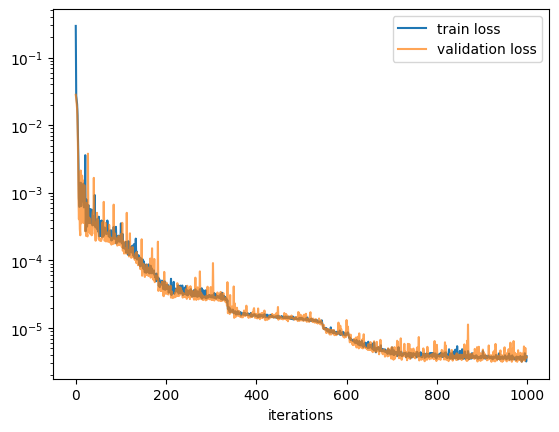

Loss is  3.824407485808479e-06


In [8]:

#Plotting the loss
loss = history.history['loss'] #Notice the built in .history function
val_loss = history.history['val_loss']

#Printing the loss across the Epochs
plt.figure(dpi=100)
plt.plot(loss, label='train loss')
plt.plot(val_loss, alpha=0.7, label='validation loss')
plt.xlabel('iterations')
plt.yscale('log')
plt.legend()
plt.show()
print("Loss is ", loss[-1]) #Printing final loss

# Loss graph should look similar to the graph from the slides


In [9]:
# Calculate mean relative error across all the Ys

Yhat = model.predict(X)

mre = np.sum(np.abs(Yhat-Y)/Y)/yn/m

print(f'mre={mre:%}\n')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
mre=0.103442%



 These functions could be used to save a model and load it later for future use. No need to run this cell.

In [ ]:
# model.save('gnr_test_model')
#model = tf.keras.models.load_model('gnr_test_model')


### **Testing our predictions**

Here we take a random index and plot the true Y values against our predicted Y values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


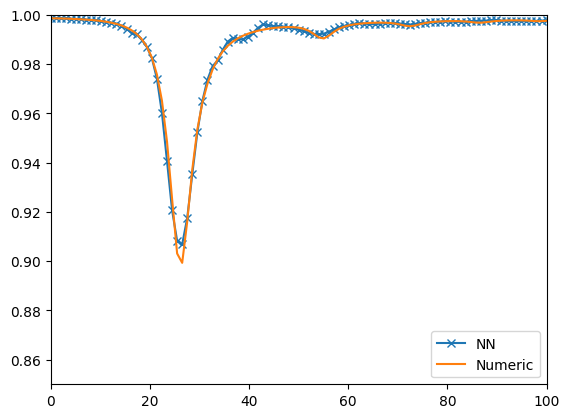

In [11]:
idx = int(np.random.rand(1)[0]*m) # Random index

#idx = # chose any sample(0-9999)

y_predicted = model.predict(np.array([X[idx, :]])) #send the input through the model

#Plot the results
freq = np.linspace(0, 100, yn)
plt.figure()
plt.plot(freq, y_predicted[0,:], '-x', label='NN')
plt.plot(freq, Y[idx,:], label='Numeric')
plt.ylim(0.85, 1)
plt.legend(loc='lower right')

plt.margins(x=0)

## **Now lets do some work!**

We will be using our trained model above for our inverse design technique.

We will be recreating the two examples shown on slide three.
Follow the code and fill in the blanks

The loss function is the biggest thing that changes; minimizing different losses will change what spectrum your method finds.

1. The first image uses mean square error to minimize the difference at each wavelength. Add that equation where asked and run the cell block with that loss. **Hint**: Code MSE yourself; the tensorflow sum function is tf.reduce_sum().
After training you will see the optimized inputs next to the target inputs. Use the next cell block to plot the spectrum of these two inputs.
 (No coding necessary, just run the cel)


---


2. Increase the Epochs to 1000 and see how close the optimized inputs are to the target.
----
3. Comment out the MSE loss function and write another imitating the integral squared loss function. The integral captures area so this loss function is attempting to find the spectrum with the most absorbtion (least reflection) in the range.
After training comment out the line in the following cell showing the target spectrum and uncomment the line for the integral squared loss
---
4. The 25-30 range is intentionally selected because out model does well in that range. Try changing the range to 15-20 and 40-45 and see what the model comes up with.


In [24]:
# FOR MSE
# Pick target spectrum - Used for the MSE optimization

idx = int(np.random.rand(1)[0]*m) #random Target

#idx = 1 # chosen target
y_target = Y[idx, :]
x_target = X[idx, :]


#Create Interval, use these as the bounds for your integral in your second step
lower = 25 #lower bound of the interval
upper = 30 # upper bound of the interval

# This is built similar to our trainin function in pytorch
epochs = 1000
opt = tf.keras.optimizers.Adam(learning_rate = 0.01) # we chose an optimizer
x0 = [0.3, 90, 45] # this is our initial guess, we just need to start somewhere
x = tf.Variable([x0]) # changing it into a variable so it can run through our model
for i in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        squared_difference = tf.square(y_pred - y_target)

      #Code Mean Square Error Below
        # loss = tf.reduce_mean(squared_difference)

      #Code Integral Squared Loss
        y_pred_interval = y_pred[:, lower:upper]
          # Compute the integral (sum) of the squared spectrum in this range
        loss = tf.reduce_sum(tf.square(y_pred_interval))


    grads = tape.gradient(loss, [x]) # Calculate gradients
    opt.apply_gradients(zip(grads, [x])) # Apply gradients to update variables

print("Optimized inputs:", x.numpy()[0]) # These are the optimized inputs. The values of our nano-ribbon to give us our desired results.
print('Target inputs:',x_target) # These are the inputs that match our target spectrum

Optimized inputs: [ 0.2662925 96.96575   35.825832 ]
Target inputs: [ 0.28750915 83.28829115 21.05273878]


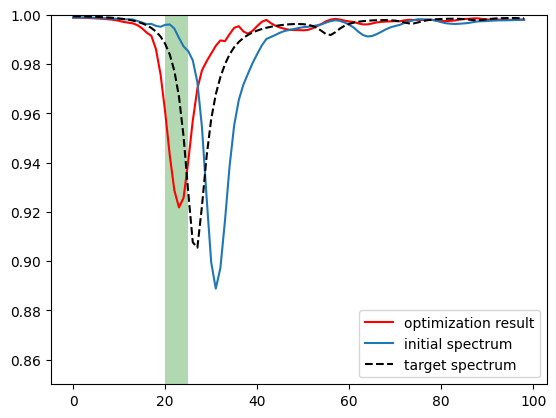

In [23]:
#Ploting the results
plt.figure(dpi=100)
plt.plot(model(x).numpy()[0], 'r', label='optimization result') # Plotting the final spectrum found by our optimized inputs
plt.plot(model(tf.constant([x0])).numpy()[0], label='initial spectrum') # Plotting our initial "guess"

# use this for MSE
plt.plot(y_target, 'k--', label='target spectrum') # Plotting the target spectrum
#use this for Integral
plt.fill_betweenx([0.85,1], lower, upper, fc='g', alpha=0.3)


plt.ylim(0.85, 1)
plt.legend()

## **Final Comments**

As you hopefully saw our inverse design network is limited by our accuracy and training of our forward model. If the inverse method come up with an input that isn't relistic, for example a negative E value, we saw our model produce some imposible spectrums.

For submission please share your favorite joke, and any comments you may have on this task.